<a href="https://colab.research.google.com/github/applesyeda/Project-1/blob/main/MY_Project_1_Part_5_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
#Uploading my data 
import pandas as pd
df = pd.read_csv('/content/sales_predictions.csv')

In [162]:
#Mouting my data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
#Uploading my libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [164]:
#Checking the first 5 rows of my data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [165]:
#Assessing variable types and missing data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [166]:
df["Outlet_Establishment_Year"] = df["Outlet_Establishment_Year"].astype(object)
df["Outlet_Establishment_Year"].dtype

dtype('O')

In [167]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [168]:
# Standardize the values in the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    3006
LF          316
low fat     112
Name: Item_Fat_Content, dtype: int64

In [169]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64

In [170]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [171]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [172]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [173]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [174]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

1. Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  

In [175]:
# Assign the target column as y
y = df['Item_Outlet_Sales']
# Assign the rest of the columns as X
X = df.drop(columns = ['Item_Outlet_Sales', "Item_Identifier", "Outlet_Identifier"])

2. Perform a train test split 

In [176]:
# Import the TTS from sklearn
from sklearn.model_selection import train_test_split
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [177]:
X_train.describe().round(0)

,Item_Weight,Item_Visibility,Item_MRP
count,5285.0,6392.0,6392.0
mean,13.0,0.0,142.0
std,5.0,0.0,63.0
min,5.0,0.0,31.0
25%,9.0,0.0,94.0
50%,13.0,0.0,144.0
75%,17.0,0.0,187.0
max,21.0,0.0,267.0


3. Create a pre processing pipeline to prepare the dataset for Machine Learning

In [178]:
# select only object columns
categoricals = X_train.select_dtypes(include='object')

# check value counts for each object column
for col in categoricals.columns:
  print(col)
  print(categoricals[col].value_counts(), '\n')

Item_Fat_Content
Low Fat    4129
Regular    2263
Name: Item_Fat_Content, dtype: int64 

Item_Type
Fruits and Vegetables    948
Snack Foods              906
Household                695
Frozen Foods             632
Dairy                    507
Canned                   481
Baking Goods             478
Health and Hygiene       390
Soft Drinks              331
Meat                     302
Breads                   175
Hard Drinks              169
Others                   130
Starchy Foods            122
Breakfast                 84
Seafood                   42
Name: Item_Type, dtype: int64 

Outlet_Establishment_Year
1985    1107
2004     709
2009     704
2002     699
2007     698
1997     695
1987     689
1999     676
1998     415
Name: Outlet_Establishment_Year, dtype: int64 

Outlet_Size
Medium    2103
Small     1788
High       689
Name: Outlet_Size, dtype: int64 

Outlet_Location_Type
Tier 3    2531
Tier 2    2106
Tier 1    1755
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type
Sup

In [179]:
scaler = StandardScaler()
scaler2 = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

missing_imputer = SimpleImputer(strategy = "constant", fill_value="Missing")
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [180]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [181]:
#Ordering my oridinal values 
store_size = ["Small", "Medium", "High"]
ordered_values = [store_size]

In [182]:
oridinal_enc = OrdinalEncoder(categories=ordered_values)

In [183]:
nom_pipe = make_pipeline(missing_imputer, ohe)
ord_pipe = make_pipeline(freq_imputer, oridinal_enc, scaler2)
num_pipe = make_pipeline(mean_imputer, scaler)

In [184]:
num_selector = make_column_selector(dtype_include='number')
num_tuple = (num_pipe, num_selector)

In [185]:
nominal_selector = ["Item_Fat_Content", "Item_Type", "Outlet_Location_Type", "Outlet_Type", "Outlet_Establishment_Year"]
nom_tuple = (nom_pipe, nominal_selector)

In [186]:
ordinal_cols = ["Outlet_Size"]
ord_tuple = (ord_pipe, ordinal_cols)

In [187]:
preprocessor = make_column_transformer(nom_tuple, num_tuple, ord_tuple, remainder = "drop")

In [188]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type',
                                  'Outlet_Establishment_Year']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimput...
                                                  SimpleImputer()),
                                                 ('standardscaler',
                     

In [189]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type',
                                  'Outlet_Establishment_Year']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimput...
                                                  SimpleImputer()),
                                                 ('standardscaler',
                     

In [190]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

####Build a linear regression model to predict sales.

Build a linear regression model.
Evaluate the performance of your model based on r^2.
Evaluate the performance of your model based on rmse.

In [191]:
def evaluate_model(y_true, y_pred):
  """Takes true target and predicted target and prints MAE, MSE, RMSE and R2"""
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

In [192]:
#Step 1: Import the model
from sklearn.linear_model import LinearRegression

In [193]:
from os import register_at_fork
# instaniate a linear regression model
lin_reg_pipe = make_pipeline(preprocessor, LinearRegression())
lin_reg_pipe.fit(X_train, y_train);

In [194]:
train_score = lin_reg_pipe.score(X_train, y_train)
print(train_score)

0.5603076235908174


In [195]:
test_score = lin_reg_pipe.score(X_test, y_test)
print(test_score)

0.5657444891578497


The R^2 value on our training and testing set was 0.56. Our train and test scores were similar which means that our model was not "overfit".  

In [196]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [197]:
train_preds = lin_reg_pipe.predict(X_train)
test_preds = lin_reg_pipe.predict(X_test)

In [198]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
print(rmse_train)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_test)

1140.7235035717438
1094.5780426805434


Since the train metric is higher than test, in the regression tree, this is high in variance. 

###2. Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model.
Compare the performance of your model based on r^2.
Compare the performance of your model based on rmse.  

In [199]:
#Import Libraries, Mount your drive, and load in your data set

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [200]:
tree_reg_pipe = make_pipeline(preprocessor, DecisionTreeRegressor(random_state = 42))
tree_reg_pipe.fit(X_train, y_train);

In [201]:
train_preds = tree_reg_pipe.predict(X_train)
test_preds = tree_reg_pipe.predict(X_test)

In [202]:
# evaluate the model
train_score = tree_reg_pipe.score(X_train, y_train)
test_score = tree_reg_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.15327247753536455


In [203]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
print(rmse_train)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_test)

4.925864104892086e-15
1528.4312229998209


This also shows that the model is overfit because the RMSE on the training data is much lower than RMSE on testing data. 

####3) You now have tried 2 different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend?
Justify your recommendation.


I would implement the linear regression because there was a moderate R^2 of .56 for both the training and testing data. This model was not overfit, as opposed to the regression tree model. 

I first created the below graph because I would like to see if there's a difference in sales between low fat items and regular items. Just by eye-balling it, the medians look about the same. There seems to be a slightly greater range (including outliers) with low fat items compared to regular. I think asssessing for this is important because if there were changes, I could investigate further if those were significant, and that may change the way retailers advertise their products. For instance, if it's found that customers tend to choose the lower fat option, retailers could advertise their lower caloried or health-consious items more to further appeal to those people and drive sales. 

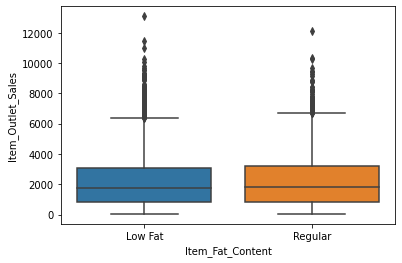

In [204]:
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales');

I would also like to look into outlet types and sales. This is important because it could be that larger stores may lead to more customers with more options, resulting in a greater number of sales. It could then be effective to assess for calculations on how much a retailer invests in a store type and it's proportions to sales revenue. In the below graph, I can see Supermarket Type 3 has the highest in sales compared to all other outlet types. This may influence how future stores are developed as retailers may be better off creating and investing resources in large supermarkets, rather then grocery stores. 



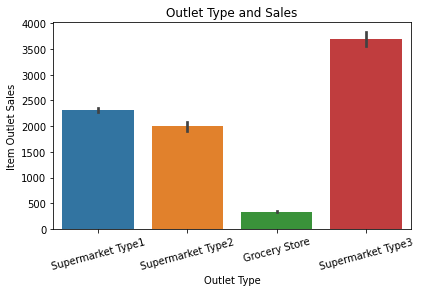

In [205]:
ax = sns.barplot(data=df, y="Item_Outlet_Sales", x= "Outlet_Type")
plt.xticks(rotation=15)
plt.tight_layout()
ax.set(xlabel='Outlet Type', ylabel='Item Outlet Sales', title = 'Outlet Type and Sales');

Lastly, I have created a heat wave to assess for correlations in my data set. There are no correlations that stand out, except for a moderate correlation between Item Outlet Sales and Item MRP. This is interesting because even though correlation doesn't equal causation, this finding could inspire further research in how materials used when making an item (MRP) could be associated with sales revenue. If there are any causal findings in further research, this may change the relatioshhip retailers have with vendors as they might change the type of material they'd request or products depending on it's association to sales revenue. 

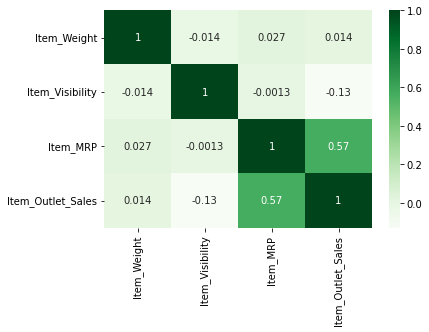

In [206]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)